In [1]:
from __future__ import annotations
from typing import Dict, List, Optional, Tuple

import os.path
from typing import Any, Dict, List, Optional, Tuple
import lark
from lark import v_args
from lark.tree import Meta

from chyp import parser
from chyp.graph import Graph, GraphError, gen, perm, identity, redistributer
from chyp.rule import Rule, RuleError
from chyp.tactic import Tactic
from chyp.tactic.simptac import SimpTac
from chyp.tactic.ruletac import RuleTac
from chyp.gui.graphscene import GraphScene
from chyp.layout import convex_layout

from PySide6.QtWidgets import QApplication
import sys
from IPython.display import Image

In [2]:
class Painter: 
    def __init__(self): 
        # Counter for images
        self.cnt = 0 
        self.app = QApplication(sys.argv)
        self.gs = GraphScene()

    def draw(self, g: Graph, scale=1): 
        convex_layout(g)
        self.gs.set_graph(g)
        self.gs.save(f'graph-{self.cnt}.png', scale=scale)
        img = Image(filename=f'graph-{self.cnt}.png')
        self.cnt += 1
        return img


p = Painter()
def draw(g: Graph, scale=1): 
    return p.draw(g, scale=scale)

In [3]:
code = """
gen g: A -> B
gen f: B -> A
gen h: A -> A

rule foo: 
    h = g ; f 

rewrite r1: 
    h * id = (g ; f) * id by foo
"""

state = parser.parse(code)

for e in state.errors: 
    print(f"Error at line {e[1]}: {e[2]}")

<lark.tree.Meta object at 0x122df7500> ['g', [('A', 1)], [('B', 1)], None]
<lark.tree.Meta object at 0x122df70b0> ['f', [('B', 1)], [('A', 1)], None]
<lark.tree.Meta object at 0x122df6ab0> ['h', [('A', 1)], [('A', 1)], None]


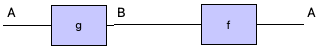

In [7]:
g = state.graphs['g'

draw(state.rewrites['r1:0'].lhs)

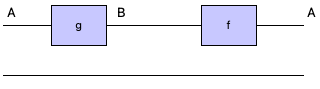

In [5]:
draw(state.rewrites['r1:0'].rhs)